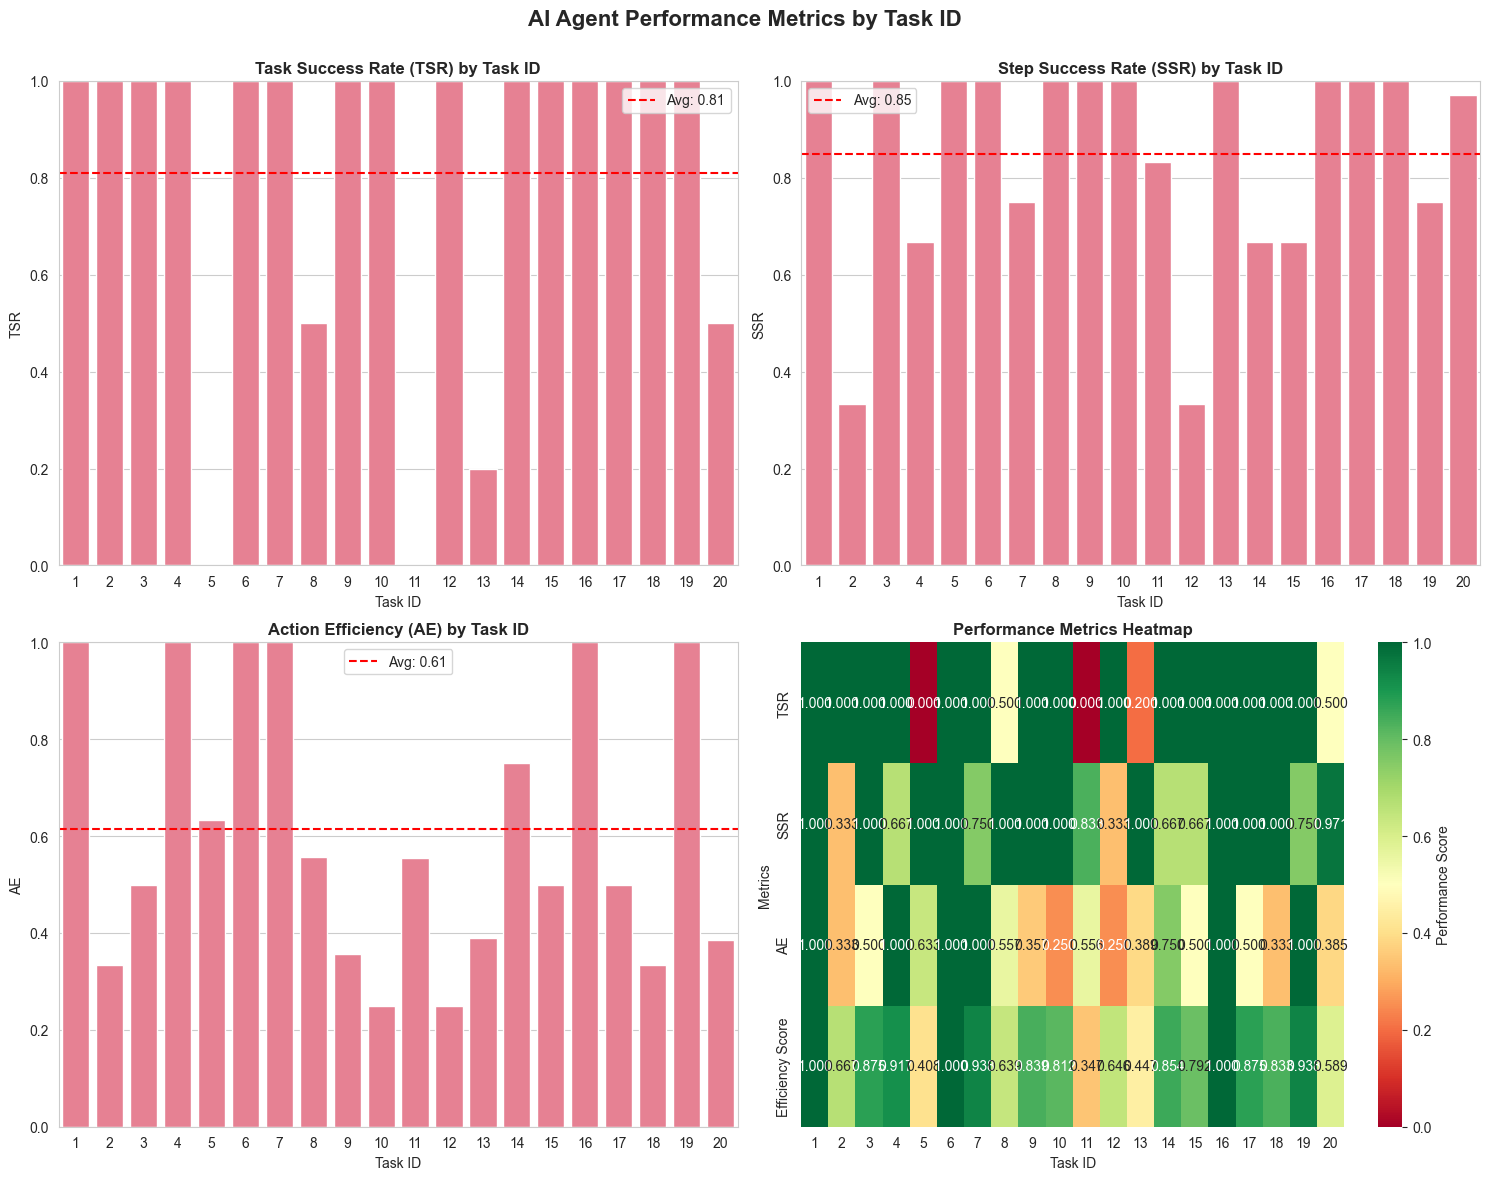

Performance Metrics by Task ID:
 Task ID  TSR   SSR    AE  Efficiency Score
       1  1.0 1.000 1.000             1.000
       6  1.0 1.000 1.000             1.000
      16  1.0 1.000 1.000             1.000
      19  1.0 0.750 1.000             0.938
       7  1.0 0.750 1.000             0.938
       4  1.0 0.667 1.000             0.917
      17  1.0 1.000 0.500             0.875
       3  1.0 1.000 0.500             0.875
      14  1.0 0.667 0.750             0.854
       9  1.0 1.000 0.357             0.839
      18  1.0 1.000 0.333             0.833
      10  1.0 1.000 0.250             0.812
      15  1.0 0.667 0.500             0.792
       2  1.0 0.333 0.333             0.667
      12  1.0 0.333 0.250             0.646
       8  0.5 1.000 0.557             0.639
      20  0.5 0.971 0.385             0.589
      13  0.2 1.000 0.389             0.447
       5  0.0 1.000 0.633             0.408
      11  0.0 0.833 0.556             0.347

Statistical Summary of Performance Metrics:

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('dataset.csv')

# Group by Task ID and calculate metrics
task_metrics = df.groupby('Task ID').agg({
    'TSR': 'mean',
    'SSR': 'mean', 
    'AE': 'mean',
    'Total Steps': 'mean',
    'Actual Actions': 'mean',
    'Optimal Actions': 'mean'
}).reset_index()

# Calculate completion ratio and efficiency score
task_metrics['Completion Ratio'] = task_metrics['Actual Actions'] / task_metrics['Total Steps']
task_metrics['Efficiency Score'] = (task_metrics['TSR'] * 0.5) + (task_metrics['SSR'] * 0.25) + (task_metrics['AE'] * 0.25)

# Set seaborn style
sns.set_style("whitegrid")
sns.set_palette("husl")

# Create visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('AI Agent Performance Metrics by Task ID', fontsize=16, fontweight='bold')

# Task Success Rate
sns.barplot(data=task_metrics, x='Task ID', y='TSR', ax=axes[0, 0])
axes[0, 0].set_title('Task Success Rate (TSR) by Task ID', fontweight='bold')
axes[0, 0].set_ylim(0, 1)
axes[0, 0].axhline(task_metrics['TSR'].mean(), color='red', linestyle='--', label=f'Avg: {task_metrics["TSR"].mean():.2f}')
axes[0, 0].legend()

# Step Success Rate
sns.barplot(data=task_metrics, x='Task ID', y='SSR', ax=axes[0, 1])
axes[0, 1].set_title('Step Success Rate (SSR) by Task ID', fontweight='bold')
axes[0, 1].set_ylim(0, 1)
axes[0, 1].axhline(task_metrics['SSR'].mean(), color='red', linestyle='--', label=f'Avg: {task_metrics["SSR"].mean():.2f}')
axes[0, 1].legend()

# Action Efficiency
sns.barplot(data=task_metrics, x='Task ID', y='AE', ax=axes[1, 0])
axes[1, 0].set_title('Action Efficiency (AE) by Task ID', fontweight='bold')
axes[1, 0].set_ylim(0, 1)
axes[1, 0].axhline(task_metrics['AE'].mean(), color='red', linestyle='--', label=f'Avg: {task_metrics["AE"].mean():.2f}')
axes[1, 0].legend()

# Combined metrics heatmap
metrics_pivot = task_metrics[['Task ID', 'TSR', 'SSR', 'AE', 'Efficiency Score']].set_index('Task ID').T
sns.heatmap(metrics_pivot, annot=True, fmt='.3f', cmap='RdYlGn', 
            ax=axes[1, 1], cbar_kws={'label': 'Performance Score'})
axes[1, 1].set_title('Performance Metrics Heatmap', fontweight='bold')
axes[1, 1].set_xlabel('Task ID')
axes[1, 1].set_ylabel('Metrics')

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

# Display the summary table with better formatting
print("Performance Metrics by Task ID:")
print(task_metrics[['Task ID', 'TSR', 'SSR', 'AE', 'Efficiency Score']].sort_values('Efficiency Score', ascending=False).round(3).to_string(index=False))

# Statistical summary
print("\nStatistical Summary of Performance Metrics:")
print(task_metrics[['TSR', 'SSR', 'AE']].describe().round(3).to_string())

# Correlation analysis
print("\nCorrelation Between Metrics:")
print(task_metrics[['TSR', 'SSR', 'AE']].corr().round(3).to_string())
